<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

### Initial exploring
First let's take this dataset and do some initial exploring such as looking at the different columns and their datatype, looking at the header, evaluating the dimensions.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## How do you read in the dataset and view the first lines?
Pokemon = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')

In [ ]:
## What is a quick way to get some information on the dataset such as datatype and dimension?
print(Pokemon.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [ ]:
## Missing data. While there does not seem to be any missing data, what is a way you can check if there any missing values in the dataset?
## How would you handle them?
print(Pokemon.isnull().sum)

<bound method DataFrame.sum of          #   Name  Type 1  Type 2  Total     HP  Attack  Defense  Sp. Atk  \
0    False  False   False   False  False  False   False    False    False   
1    False  False   False   False  False  False   False    False    False   
2    False  False   False   False  False  False   False    False    False   
3    False  False   False   False  False  False   False    False    False   
4    False  False   False    True  False  False   False    False    False   
..     ...    ...     ...     ...    ...    ...     ...      ...      ...   
795  False  False   False   False  False  False   False    False    False   
796  False  False   False   False  False  False   False    False    False   
797  False  False   False   False  False  False   False    False    False   
798  False  False   False   False  False  False   False    False    False   
799  False  False   False   False  False  False   False    False    False   

     Sp. Def  Speed  Generation  Legendary  

## Let's practice some basic data exploration
Answer the following questions below

In [ ]:
## How many Pokémon are there in total?
print(f"Total Pokemon: {len(Pokemon)}")

Total Pokemon: 800


In [ ]:
## What is the average HP (Hit Points) of all Pokémon?
average_HP = Pokemon["HP"].mean()
print(f"Average HP: {average_HP}")

Average HP: 69.25875


In [ ]:
## Which Pokémon has the highest Attack stat?
high_attack = Pokemon['Attack'].max()
strongest_attack = Pokemon[Pokemon['Attack']==high_attack]
print(strongest_attack[['Name', 'Attack']])

                    Name  Attack
163  MewtwoMega Mewtwo X     190


In [ ]:
## What are the top 5 Pokémon with the highest total stats?
Pokemon_sorted = Pokemon.sort_values(by = 'Total', ascending=False)
Top_5 = Pokemon_sorted.iloc[:5]
print(Top_5[['Name', 'Total']])

                      Name  Total
426  RayquazaMega Rayquaza    780
163    MewtwoMega Mewtwo X    780
164    MewtwoMega Mewtwo Y    780
422    KyogrePrimal Kyogre    770
424  GroudonPrimal Groudon    770


In [ ]:
## Q: Which Pokémon types are most common across the Type I?
common_type = Pokemon['Type 1'].value_counts
print(common_type)

<bound method IndexOpsMixin.value_counts of 0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object>


In [ ]:
from genericpath import samefile
## Are there any Pokémon that have both 'Type 1' and 'Type 2' being the same? How do you filter them?
two_types = Pokemon.loc[Pokemon['Type 1']==Pokemon['Type 2'], ['Name', 'Type 1', 'Type 2']]
print(two_types)

Empty DataFrame
Columns: [Name, Type 1, Type 2]
Index: []


## Now let's practice with some plotting.

From the plot, I observed....

<ipython-input-29-af787b1a0e41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = Pokemon, x = 'Type 1', order=Pokemon['Type 1'].value_counts().index, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

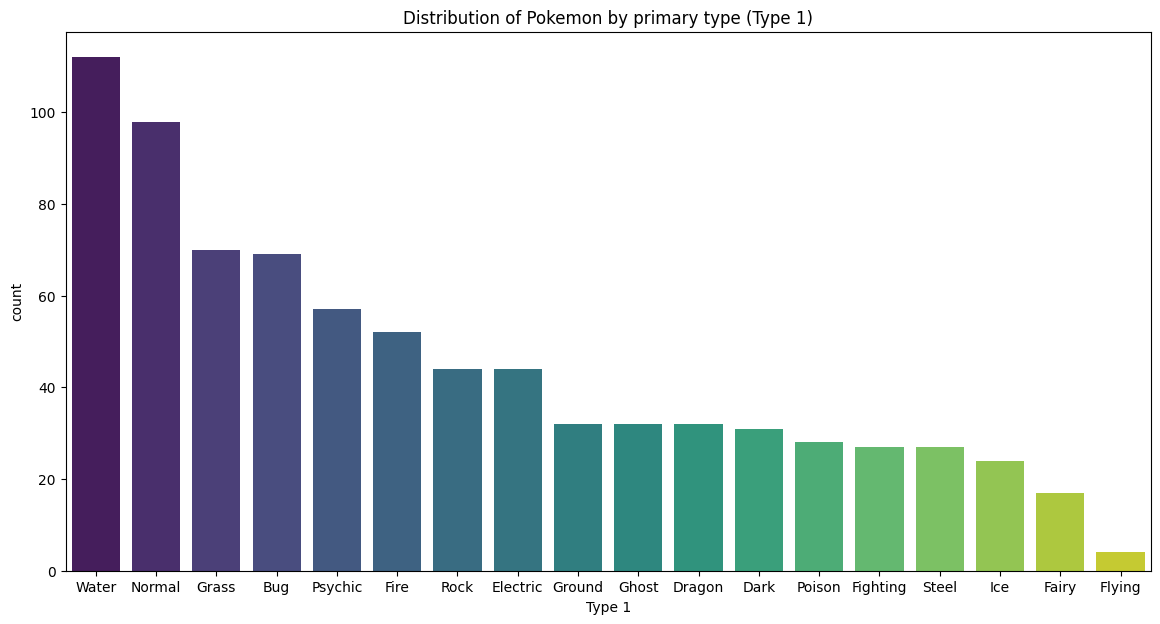

In [ ]:
## What is the distribution of Pokémon by their primary type ('Type 1')? (Visualize this)
plt.figure(figsize=(14,7))
sns.countplot(data = Pokemon, x = 'Type 1', order=Pokemon['Type 1'].value_counts().index, palette='viridis')
plt.title("Distribution of Pokemon by primary type (Type 1)")
plt.show

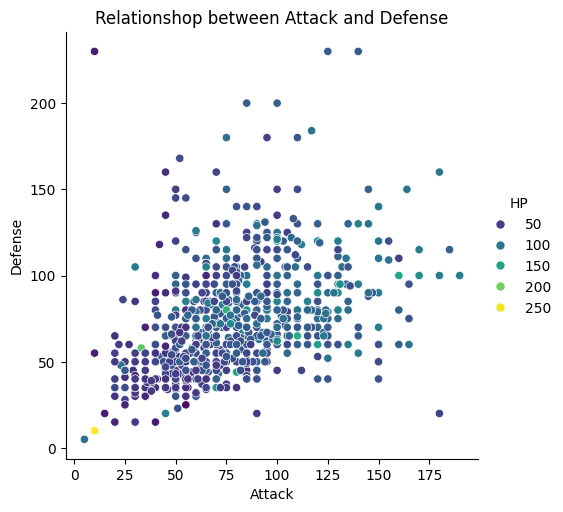

In [ ]:
## Plot the relationship between Attack and Defense
## Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint.
sns.relplot(data = Pokemon, x = 'Attack', y = 'Defense', hue = 'HP', palette = 'viridis')
plt.title('Relationshop between Attack and Defense')
plt.show()